In [3]:
import os
import numpy as np
import yaml
import pandas as pd
import networkx as nx

In [4]:
X_train = pd.read_csv('Louvain/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Louvain/node_y_train.csv', index_col=0)

In [5]:
runs = 100

In [6]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [8]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9505409582689336, 0.9489953632148377, 0.9489953632148377, 0.955177743431221, 0.9489953632148377, 0.9505409582689336, 0.9520865533230294, 0.9474497681607419, 0.9505409582689336, 0.9520865533230294, 0.9520865533230294, 0.9489953632148377, 0.9505409582689336, 0.9489953632148377, 0.9536321483771252, 0.9520865533230294, 0.9520865533230294, 0.9505409582689336, 0.9520865533230294, 0.9520865533230294, 0.9489953632148377, 0.9505409582689336, 0.9536321483771252, 0.9459041731066461, 0.9505409582689336, 0.955177743431221, 0.9536321483771252, 0.9536321483771252, 0.9536321483771252, 0.9474497681607419, 0.9520865533230294, 0.9536321483771252, 0.9582689335394127, 0.9520865533230294, 0.955177743431221, 0.9520865533230294, 0.9489953632148377, 0.9505409582689336, 0.9505409582689336, 0.9536321483771252, 0.9520865533230294, 0.9536321483771252, 0.9474497681607419, 0.9520865533230294, 0.9536321483771252, 0.9459041731066461, 0.9474497681607419, 0.9536321483771252, 0.9489953632148377, 0.9489953632148377, 0.

In [9]:
df_importances = pd.DataFrame(rows).set_index("run")

In [10]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

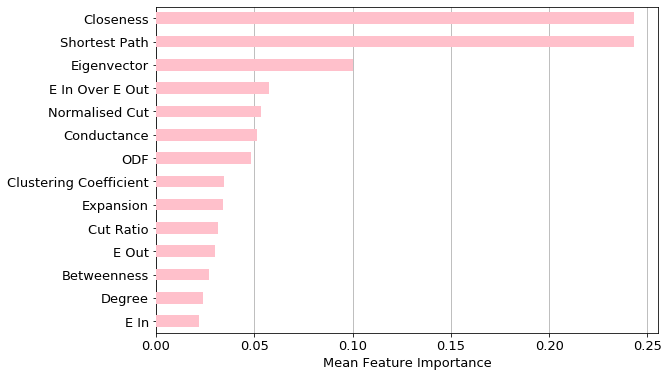

In [11]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="pink", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [12]:
X_train = pd.read_csv('Infomap/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Infomap/node_y_train.csv', index_col=0)

In [13]:
runs = 100

In [14]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [16]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9010819165378671, 0.8964451313755796, 0.8948995363214838, 0.8964451313755796, 0.8979907264296755, 0.9010819165378671, 0.8979907264296755, 0.8948995363214838, 0.8902627511591963, 0.8918083462132921, 0.893353941267388, 0.893353941267388, 0.8979907264296755, 0.8964451313755796, 0.8995363214837713, 0.8948995363214838, 0.8964451313755796, 0.8918083462132921, 0.8979907264296755, 0.893353941267388, 0.893353941267388, 0.8918083462132921, 0.8979907264296755, 0.8948995363214838, 0.8948995363214838, 0.8979907264296755, 0.8948995363214838, 0.8964451313755796, 0.8948995363214838, 0.8995363214837713, 0.8948995363214838, 0.8979907264296755, 0.8918083462132921, 0.8995363214837713, 0.893353941267388, 0.8979907264296755, 0.8964451313755796, 0.8902627511591963, 0.8964451313755796, 0.8948995363214838, 0.8964451313755796, 0.8918083462132921, 0.8964451313755796, 0.8964451313755796, 0.8918083462132921, 0.8918083462132921, 0.8948995363214838, 0.893353941267388, 0.9010819165378671, 0.8871715610510046, 0.891

In [17]:
df_importances = pd.DataFrame(rows).set_index("run")

In [18]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

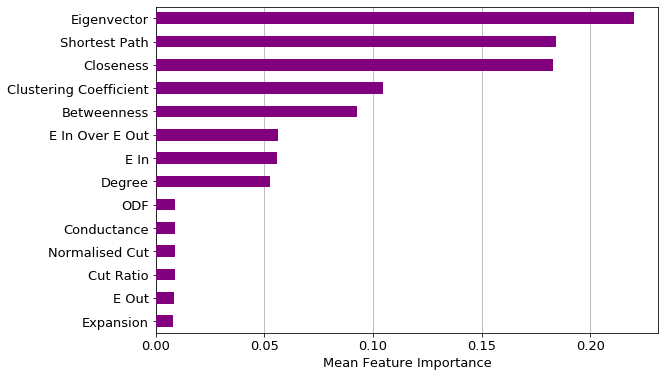

In [19]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="purple", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [20]:
X_train = pd.read_csv('LPA/node_x_train.csv', index_col=0)
y_train = pd.read_csv('LPA/node_y_train.csv', index_col=0)

In [21]:
runs = 100

In [22]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [24]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.7542503863987635, 0.7619783616692427, 0.7635239567233385, 0.7557959814528593, 0.768160741885626, 0.7542503863987635, 0.7619783616692427, 0.7650695517774343, 0.7573415765069552, 0.7666151468315301, 0.768160741885626, 0.7573415765069552, 0.7635239567233385, 0.7619783616692427, 0.7712519319938176, 0.7604327666151468, 0.758887171561051, 0.7511591962905718, 0.7650695517774343, 0.758887171561051, 0.7542503863987635, 0.7650695517774343, 0.7619783616692427, 0.7542503863987635, 0.7666151468315301, 0.7697063369397218, 0.7604327666151468, 0.758887171561051, 0.7604327666151468, 0.7511591962905718, 0.7573415765069552, 0.768160741885626, 0.758887171561051, 0.758887171561051, 0.7542503863987635, 0.7573415765069552, 0.7697063369397218, 0.768160741885626, 0.7604327666151468, 0.7557959814528593, 0.7557959814528593, 0.7573415765069552, 0.7573415765069552, 0.7619783616692427, 0.758887171561051, 0.7650695517774343, 0.7650695517774343, 0.7666151468315301, 0.758887171561051, 0.7557959814528593, 0.76043276

In [25]:
df_importances = pd.DataFrame(rows).set_index("run")

In [26]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

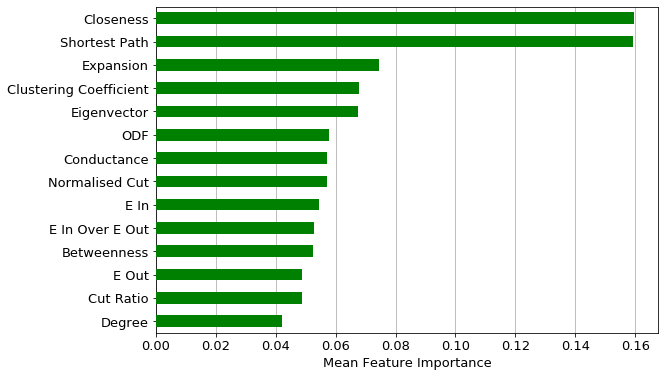

In [27]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="green", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()